In [2]:
!pip install missingno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # No module named 'missingno' 발생시

In [7]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
train.shape, test.shape

((891, 12), (418, 11))

In [8]:
## 데이터 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# 만약 전체 열이 확인 안 될 때,
for col in train.columns:
    print("column : ", col)
    print(train[col].head())
    print()

column :  PassengerId
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

column :  Survived
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

column :  Pclass
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

column :  Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

column :  Sex
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

column :  Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

column :  SibSp
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

column :  Parch
0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

column :  Ticket
0           A/5 21171
1            PC 17599
2    STON/O2. 3101282

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

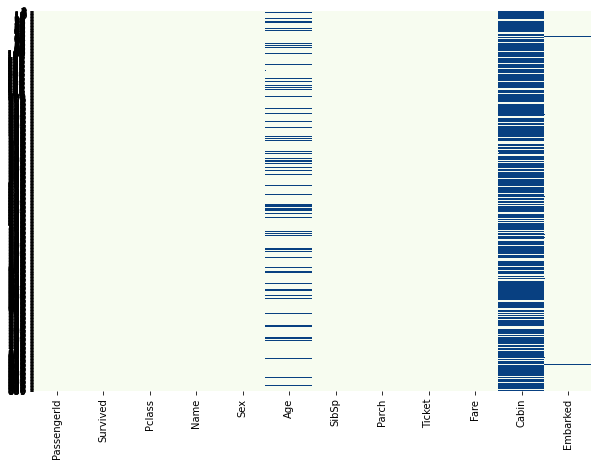

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="GnBu")

<AxesSubplot:>

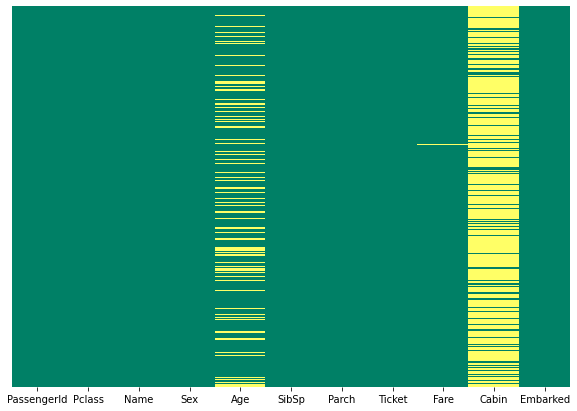

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap="summer")

In [16]:
num_cols = [col for col in train.columns[:12] if train[col].dtype in ['int64', 'float64'] ]
print(num_cols)
train[num_cols].describe()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
cat_cols = [col for col in train.columns[:12] if train[col].dtype in ['O'] ]
train[cat_cols].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vande Velde, Mr. Johannes Joseph",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [18]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

<AxesSubplot:xlabel='Survived', ylabel='count'>

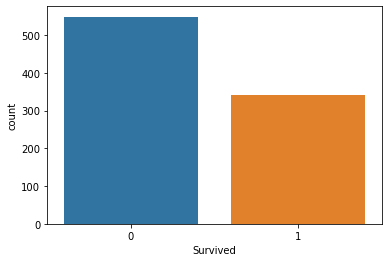

In [19]:
sns.countplot(x="Survived", data = train)

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### PClass별 생존자는 얼마나 될까
 * PClass, 생존자(Survived)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

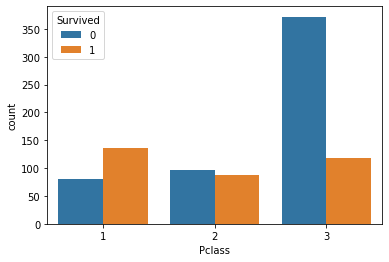

In [21]:
sns.countplot(x="Pclass", hue='Survived', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

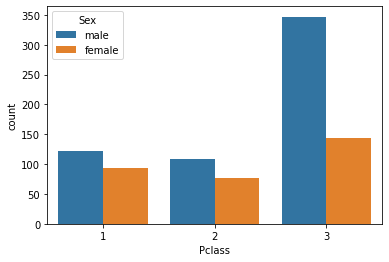

In [22]:
# [가설1] 혹시 1등급은 여성이 더 많아서 그런것은 아닐까? (남성이 더 많다. 이 가설은 생각을 해보자.)
# [추가가설]
sns.countplot(x='Pclass', hue='Sex', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

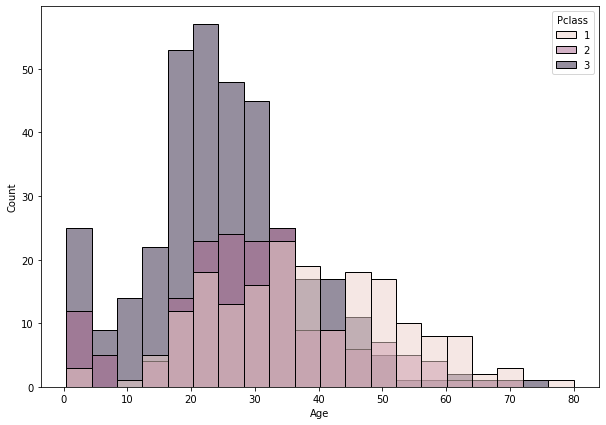

In [23]:
# [가설2] Pclass별 나이를 확인해 봐야 하는데...
#   -- 나이가 많은 분들이 많이 구조된 것 같다.
#   -- 나이가 적은 사람들은 1등급에 별로 없다.

# 생존에 영향을 끼치는 요소 - Age, Pclass
plt.figure(figsize=(10,7))
sns.histplot(x='Age',hue='Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

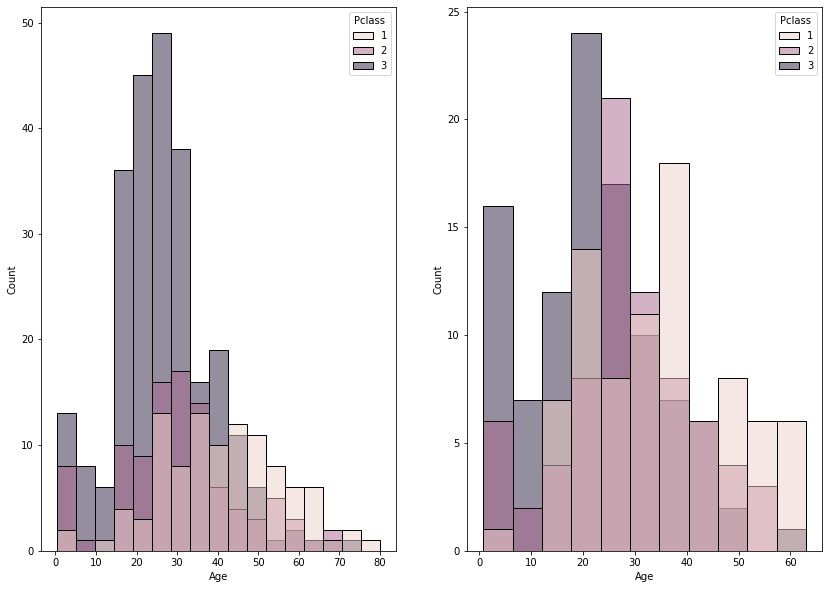

In [24]:
# [추가가설] 남성이 구조에 후 순위에 있었다. 3등급은 남성이 많기 때문에 ... ( 어느 정도 맞는 것 같다.)
# 3등급
# 남성, 여성
train_m = train[train['Sex']=='male']
train_f = train[train['Sex']=='female']

# 생존에 영향을 끼치는 요소 - Age, Pclass
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
sns.histplot(x='Age', hue='Pclass', data=train_m)

plt.subplot(1, 2, 2)
sns.histplot(x='Age', hue='Pclass', data=train_f)

In [25]:
# 생존에 영향을 끼치는 요소 - Age, Pclass, Sex

<AxesSubplot:xlabel='Embarked', ylabel='count'>

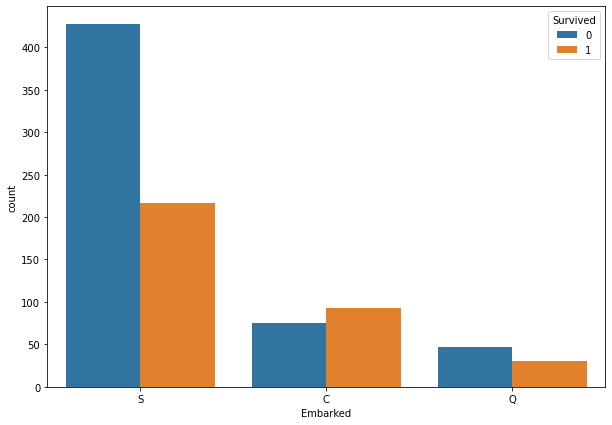

In [26]:
### Embarked가 어떤 영향을 끼쳤을까? 승선항(C=쉘 부르크, Q=퀸즈타운, S=사우스햄튼)
plt.figure(figsize=(10,7))
sns.countplot(x='Embarked',hue='Survived', data=train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

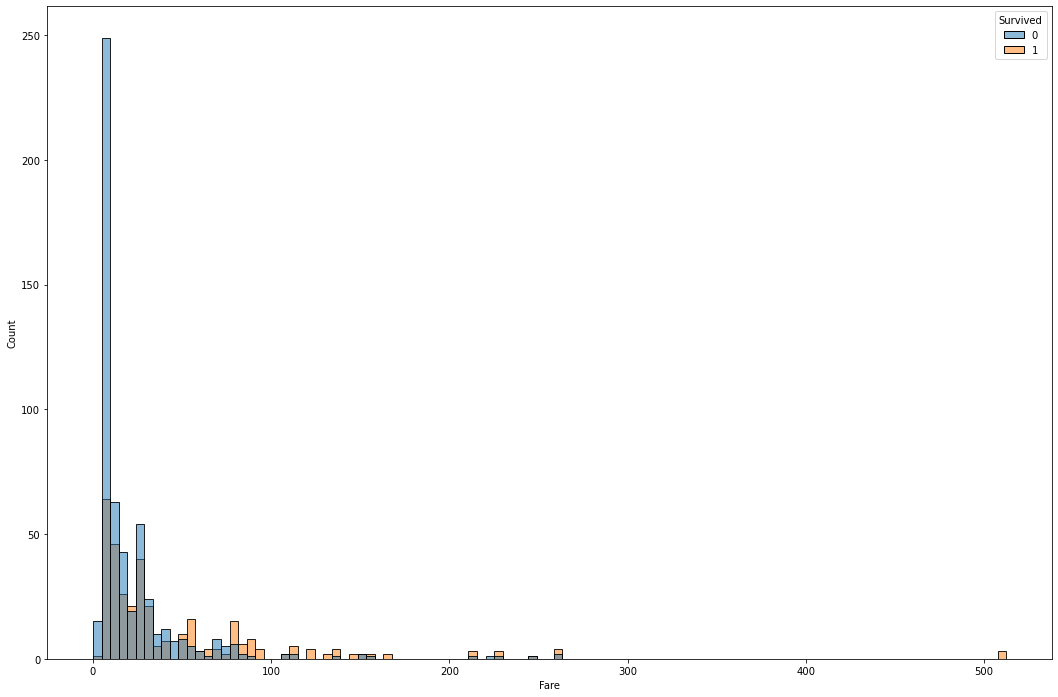

In [27]:
### Fare도 생존에 어느정도 영향을 끼친다.
plt.figure(figsize=(18,12))
sns.histplot(x='Fare',hue='Survived', data=train)